In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [186]:
# Load data
file_path = "./mnist_test.csv"
data = pd.read_csv(file_path)

In [187]:
digit = 9
# Gets the digit
labels = data['label']
features = data.drop(columns=['label'])

# Filter only the digit data
X_digit = features[labels == digit].values

In [188]:
# De-mean the data
mean_digit = np.mean(X_digit)
X_digit_mean_removed = X_digit - mean_digit

# Apply PCA
pca_digit = PCA(n_components=12)
pca_digit.fit(X_digit_mean_removed)

# Eigenvalues
singular_values_digit = pca_digit.singular_values_

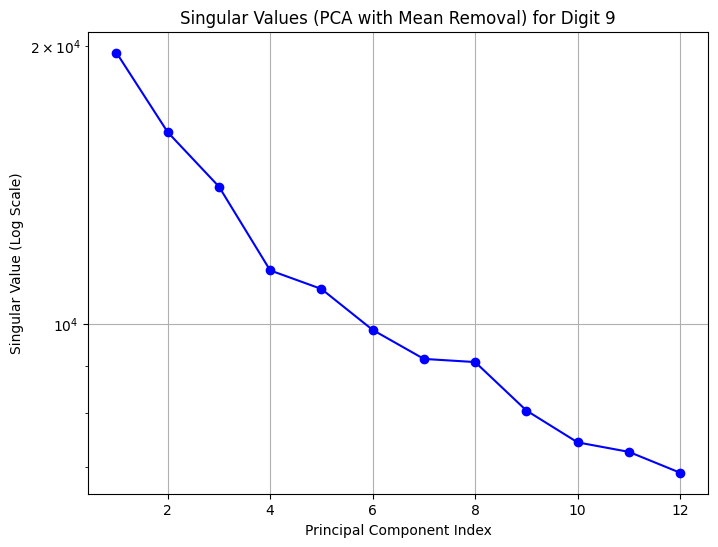

In [189]:
# Plot the magnitude of the first 12 singular values (eigenvalues) on a log scale
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), singular_values_digit, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.xlabel('Principal Component Index')
plt.ylabel('Singular Value (Log Scale)')
plt.title('Singular Values (PCA with Mean Removal) for Digit {digit}'.format(digit=digit))
plt.grid(True)
plt.show()

In [190]:
# Without removing the mean
pca_digit_no_mean = PCA(n_components=12)
pca_digit_no_mean.fit(X_digit)

# Eigenvalues
singular_values_digit_no_mean = pca_digit_no_mean.singular_values_

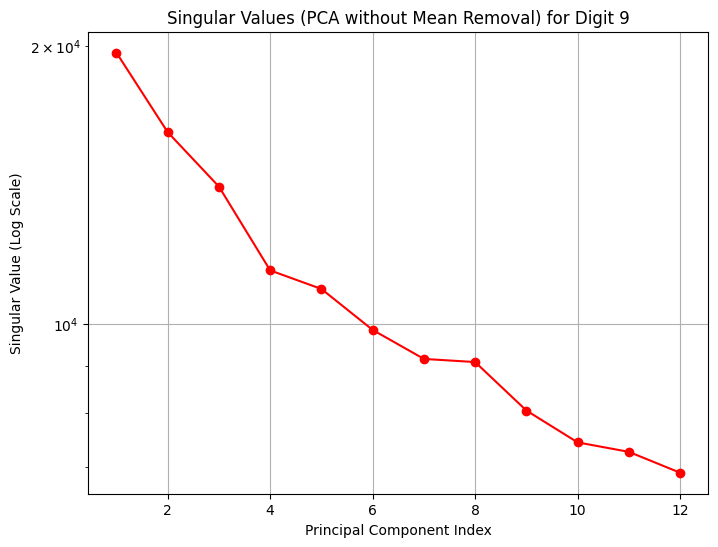

In [191]:
# Plot the magnitude of the first 12 singular values (eigenvalues) on a log scale
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), singular_values_digit_no_mean, marker='o', linestyle='-', color='r')
plt.yscale('log')
plt.xlabel('Principal Component Index')
plt.ylabel('Singular Value (Log Scale)')
plt.title('Singular Values (PCA without Mean Removal) for Digit {digit}'.format(digit=digit))
plt.grid(True)
plt.show()

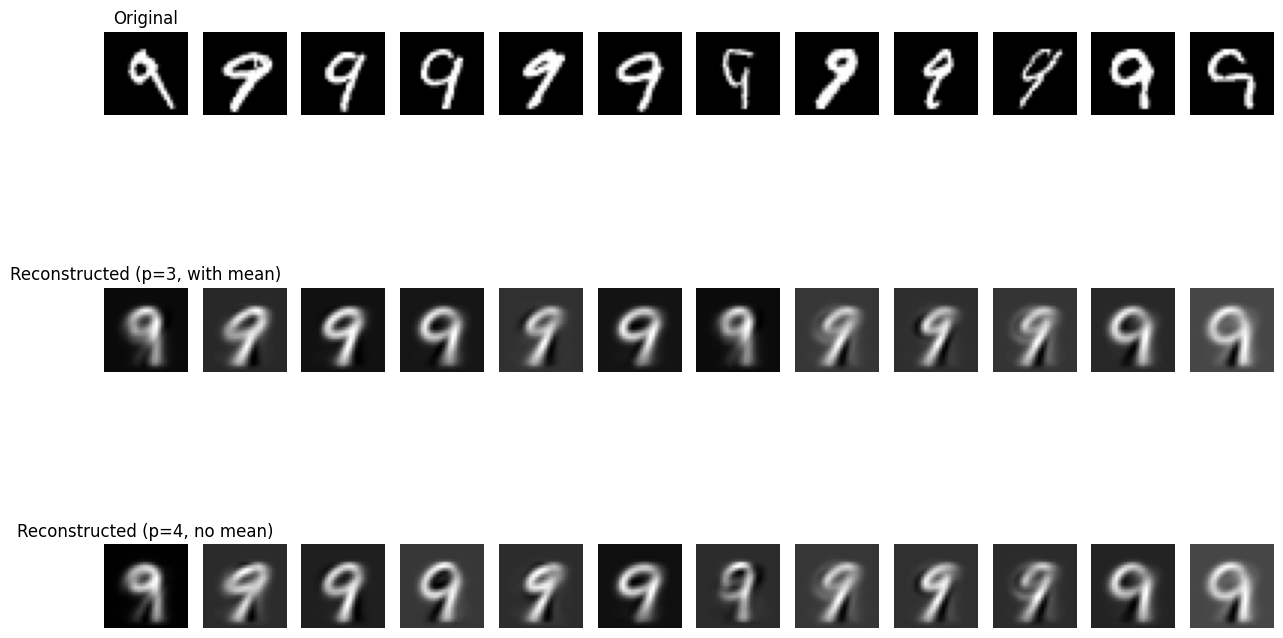

In [192]:
original_images = X_digit[:12]

# Reconstruction with p = 3 dimensions (with mean removal)
pca_digit_p3 = PCA(n_components=3)
X_pca_p3 = pca_digit_p3.fit_transform(X_digit_mean_removed)
X_reconstructed_p3 = pca_digit_p3.inverse_transform(X_pca_p3) + mean_digit

# Reconstruction with p = 4 dimensions (without mean removal)
pca_digit_p4_no_mean = PCA(n_components=4)
X_pca_p4_no_mean = pca_digit_p4_no_mean.fit_transform(X_digit)
X_reconstructed_p4_no_mean = pca_digit_p4_no_mean.inverse_transform(X_pca_p4_no_mean)

# Function to plot the images
def plot_digit_comparison(original, reconstructed_p3, reconstructed_p4, n=12):
    plt.figure(figsize=(12, 9))
    for i in range(n):
        # Original image
        plt.subplot(3, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Original")

        # Reconstruction with p = 3 (with mean removal)
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(reconstructed_p3[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Reconstructed (p=3, with mean)")

        # Reconstruction with p = 4 (without mean removal)
        plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed_p4[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Reconstructed (p=4, no mean)")
    plt.tight_layout()
    plt.show()

# Plot the comparison
plot_digit_comparison(original_images, X_reconstructed_p3, X_reconstructed_p4_no_mean)